In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [2]:
from pycalphad.core.solver import InteriorPointSolver
class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)
v.T.default_value = 300
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'LIQUID', 'HCP_A3'],
                 {v.X('ZN'): (1e-4,1-1e-4,0.1), v.NP('LIQUID'): 1e-4,
                  v.P: 1e5}, verbose=False, solver=ProblemSaver())
print(eq2)

('Composition Sets', [CompositionSet(FCC_A1, [ 0.12024048  0.87975952], NP=0.3333333333333333, GM=-10489.356271065853), CompositionSet(HCP_A3, [  1.00000000e-15   1.00000000e+00], NP=0.3333333333333333, GM=-12489.369042318192), CompositionSet(LIQUID, [ 0.00200401  0.99799599], NP=0.0001 [fixed], GM=-8422.501520948985)])
('Chemical Potentials', array([ 0.,  0.]))
Calculation Failed:  OrderedDict([('N', array(1.0)), ('NP_LIQUID', array(0.0001)), ('P', array(100000.0)), ('X_ZN', array(0.4001))]) b'Maximum number of iterations exceeded (can be specified by an option).'
Chemical Potentials [-23558.61755917 -32280.20883163]
[  1.00000000e+00   1.00000000e+05   1.00000000e-04   0.00000000e+00
   1.16415322e-10  -1.16415322e-10   1.00000000e+06   4.00100024e+05
  -1.23732009e+01   7.28975583e-02]
[  1.00000000e+00   1.00000000e+05   6.60677456e+02   5.99965687e-01
   4.00034313e-01   1.12251663e-01   8.87748337e-01   1.49126478e-01
   8.50873522e-01   9.99857706e-01   4.22935570e-05   1.000000

Trying to improve poor solution
Calculation Failed:  OrderedDict([('N', array(1.0)), ('NP_LIQUID', array(0.0001)), ('P', array(100000.0)), ('X_ZN', array(0.8001))]) b'Maximum number of iterations exceeded (can be specified by an option).'
Chemical Potentials [-23389.52616665 -18880.87783807]
[  1.00000000e+00   1.00000000e+05   1.29208853e-05  -1.16415322e-10
   4.00177669e-11   1.16415322e-10   1.00000000e+06   7.69280799e+05
  -3.73544967e+03   1.74454436e+03]
[  1.00000000e+00   1.00000000e+05   5.76499203e+02   2.91485507e-04
   9.99708514e-01   9.71344480e-01   2.86555199e-02   3.47021539e-01
   6.52978461e-01   7.62694947e-01   2.37292132e-01   1.29208853e-05]
Status: -1 b'Maximum number of iterations exceeded (can be specified by an option).'
('Composition Sets', [CompositionSet(FCC_A1, [ 0.12024048  0.87975952], NP=0.3333333333333333, GM=-10489.356271065853), CompositionSet(HCP_A3, [  1.00000000e-15   1.00000000e+00], NP=0.3333333333333333, GM=-12489.369042318192), CompositionS

In [3]:
eq2.GM - ((eq2.NP.isel(vertex=0) * eq2.MU * eq2.X.isel(vertex=0)).sum() + 
          (eq2.NP.isel(vertex=1) * (eq2.MU * eq2.X.isel(vertex=1)).sum()) + 
          (eq2.NP.isel(vertex=2) * (eq2.MU * eq2.X.isel(vertex=2)).sum()))

<xarray.DataArray (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 10)>
array([[[[           nan,            nan,            nan,            nan,
                     nan,  148984.257908,            nan,            nan,
                     nan,            nan]]]])
Coordinates:
  * N          (N) float64 1.0
  * NP_LIQUID  (NP_LIQUID) float64 0.0001
  * P          (P) float64 1e+05
  * X_ZN       (X_ZN) float64 0.0001 0.1001 0.2001 0.3001 0.4001 0.5001 ...
    vertex     int64 2

In [4]:
eq2.X

<xarray.DataArray 'X' (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 10, vertex: 3, component: 2)>
array([[[[[[           nan,            nan],
           [           nan,            nan],
           [           nan,            nan]],

          [[  8.999153e-01,   1.000847e-01],
           [  7.465542e-01,   2.534458e-01],
           [           nan,            nan]],

          [[           nan,            nan],
           [           nan,            nan],
           [           nan,            nan]],

          [[  6.999379e-01,   3.000621e-01],
           [  3.212350e-01,   6.787650e-01],
           [           nan,            nan]],

          [[           nan,            nan],
           [           nan,            nan],
           [           nan,            nan]],

          [[  9.999890e-01,   1.104836e-05],
           [  2.965381e-02,   9.703462e-01],
           [  8.988945e-01,   1.011055e-01]],

          [[           nan,            nan],
           [           nan,            nan],
   

[  1.00000000e-04   1.00100000e-01   2.00100000e-01   3.00100000e-01
   4.00100000e-01   5.00100000e-01   6.00100000e-01   7.00100000e-01
   8.00100000e-01   9.00100000e-01]
[          nan  849.65080148           nan  739.55641728           nan
  598.68831265           nan  643.78172679           nan           nan]


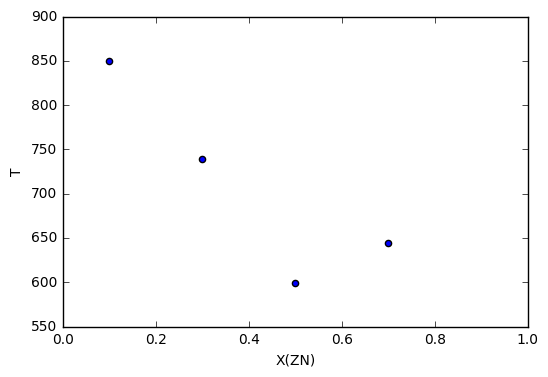

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(eq2['X_ZN'].values.flatten())
print(eq2['T'].values.flatten())
plt.scatter(eq2['X_ZN'].values.flatten(), eq2['T'].values.flatten())
plt.xlim((0,1))
plt.xlabel('X(ZN)')
plt.ylabel('T')

In [6]:
fcc = calculate(dbf, ['AL', 'ZN', 'VA'], 'FCC_A1',
                 T=float(eq2['T']), P=1e5)
hcp = calculate(dbf, ['AL', 'ZN', 'VA'], 'HCP_A3',
                 T=float(eq2['T']), P=1e5)
liq = calculate(dbf, ['AL', 'ZN', 'VA'], 'LIQUID',
                 T=float(eq2['T']), P=1e5)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,12))
plt.scatter(fcc.X.sel(component='ZN').values.flatten(),
            fcc.GM.values.flatten(), c='g')
plt.scatter(hcp.X.sel(component='ZN').values.flatten(),
            hcp.GM.values.flatten(), c='y')
plt.scatter(liq.X.sel(component='ZN').values.flatten(),
            liq.GM.values.flatten(), c='b')
plt.plot([0,1], eq2.MU.values.flatten())
plt.scatter([0.1], [float(eq2.GM)])
plt.grid(True)

In [ ]:
eq2.Y

In [ ]:
eq2.MU

In [ ]:
eq2.GM

In [ ]:
import numpy as np
def constraint_calculator(temps):
    # Should be zero at T=800
    x_in = [1.0, 101325, 800, 0.828636,  0.171364, 0.549538,  0.450462, 0.7183, 0.2817]
    #x_in = [1.0, 101325, 800, 1-1e-4, 1e-4, 1e-6, 1-1e-6,  0.7183, 0.2817]
    #x_in = [1.0, 101325, 800,  9.58792139e-01, 4.12078612e-02,
    #                           1.11325490e-03, 9.98886745e-01,
    #        7.81981056e-01, 2.18018944e-01]
    #x_in = [1.0, 101325, 800,  9.58792139e-01, 4.12078612e-02,
    #                           1.11325490e-03, 9.98886745e-01,
    #        0.5, 0.5]
    desired_chempots = [-31050.173963, -45108.31854]
    cons = []
    total_chempots = []
    fixed_chempots = []
    free_chempots_1 = []
    free_chempots_2 = []
    for temp in temps:
        x_in[2] = temp
        cons.append(ProblemSaver.saved_problem[0].constraints(x_in))
        total_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in))
        fixed_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=1))
        free_chempots_1.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=0))
        free_chempots_2.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, free_only=True))
    cons = np.array(cons - np.array(ProblemSaver.saved_problem[0].cl))
    total_chempots = np.array(total_chempots) - np.array(desired_chempots)
    fixed_chempots = np.array(fixed_chempots) - np.array(desired_chempots)
    free_chempots_1 = np.array(free_chempots_1) - np.array(desired_chempots)
    free_chempots_2 = np.array(free_chempots_2) - np.array(desired_chempots)
    return cons, total_chempots, fixed_chempots, free_chempots_1, free_chempots_2

def constraint_calculator_2(xfccs):
    # Should be zero at T=800
    #x_in = [1.0, 101325, 800, 0.828636,  0.171364, 0.549538,  0.450462, 0.7183, 0.2817]
    x_in = [1.00000000e+00,   1.00000000e+05,   8.50126199e+02,   9.00017331e-01,
   9.99826692e-02,   8.88953035e-01,   1.11046965e-01,   7.26819236e-01,
   2.73180764e-01,   9.99899010e-01,   1.00000000e-06,   1.00000000e-04]
    desired_chempots = [-31050.173963, -45108.31854]
    cons = []
    total_chempots = []
    fixed_chempots = []
    free_chempots_1 = []
    free_chempots_2 = []
    for xfcc in xfccs:
        x_in[2] = 300
        x_in[3] = xfcc
        x_in[4] - 1-xfcc
        cons.append(ProblemSaver.saved_problem[0].constraints(x_in))
        total_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in))
        fixed_chempots.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=1))
        free_chempots_1.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, selected_phase=0))
        free_chempots_2.append(ProblemSaver.saved_problem[0].chemical_potentials(x_in, free_only=True))
    cons = np.array(cons - np.array(ProblemSaver.saved_problem[0].cl))
    total_chempots = np.array(total_chempots) - np.array(desired_chempots)
    fixed_chempots = np.array(fixed_chempots) - np.array(desired_chempots)
    free_chempots_1 = np.array(free_chempots_1) - np.array(desired_chempots)
    free_chempots_2 = np.array(free_chempots_2) - np.array(desired_chempots)
    return cons, total_chempots, fixed_chempots, free_chempots_1, free_chempots_2

temps = np.arange(300., 2000., step=100)
xfccs = np.linspace(1e-6,1-1e-6, num=100)
#results = constraint_calculator(temps)
results_2 = constraint_calculator_2(xfccs)

%matplotlib inline
import matplotlib.pyplot as plt
#plt.plot(temps, results[0][:, -2], label='cons 1')
#plt.plot(temps, results[0][:, -1], label='cons 2')
#plt.plot(temps, results[1][:, 0], label='total')
#plt.plot(temps, results[2][:, 0], label='fixed')
#plt.plot(temps, results[3][:, 0], label='free 1')
#plt.plot(temps, results[4][:, 0], label='free 2')
#plt.ylim((-1000, 1000))
#plt.xlim((700, 900))
plt.plot(xfccs, results_2[0][:, -2], label='cons 1')
plt.plot(xfccs, results_2[0][:, -1], label='cons 2')
plt.plot([])
plt.legend(loc='best')